In [47]:
import pandas as pd
import os
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
os.chdir('C:\\Users\\zhong\\git\\Bikeshare\\Data')

In [3]:
df = pd.read_csv("hourly.csv")

In [4]:
df.dteday = pd.to_datetime(df.dteday)

## Modify data type for categorical variables

In [5]:
df.season = df.season.astype("category")
df.yr = df.yr.astype("category")
df.mnth = df.mnth.astype("category")
df.hr = df.hr.astype("category")
df.holiday = df.holiday.astype("category")
df.weekday = df.weekday.astype("category")
df.workingday = df.workingday.astype("category")
df.weathersit = df.weathersit.astype("category")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  category      
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

No NA

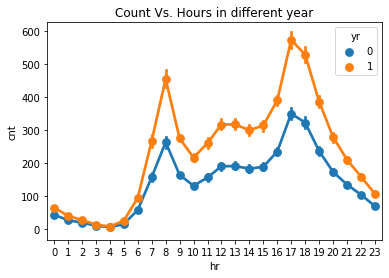

In [14]:
sns.pointplot(x = df.hr,y = df.cnt, hue =df.yr)
plt.title("Count Vs. Hours in different year")
plt.show()

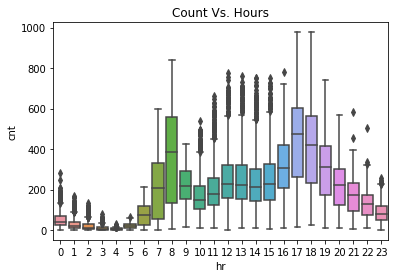

In [16]:
sns.boxplot(y=df.cnt,x=df.hr)
plt.title("Count Vs. Hours")
plt.show()

We can observed the peak hours are at 8 and 17,18.

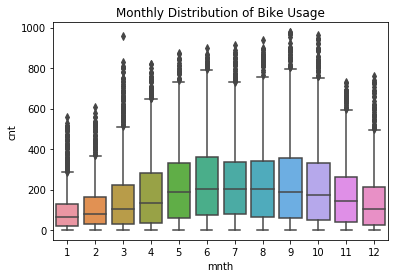

In [21]:
sns.boxplot(y=df.cnt,x=df.mnth)
plt.title("Monthly Distribution of Bike Usage")
plt.show()

From this plot, we can observe there is a significant difference of bike usage in some months.

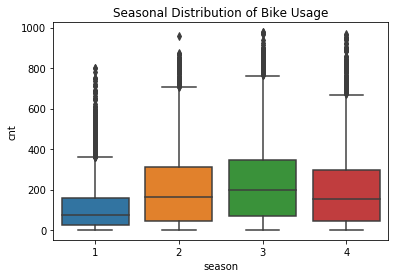

In [22]:
sns.boxplot(y=df.cnt,x=df.season)
plt.title("Seasonal Distribution of Bike Usage")
plt.show()

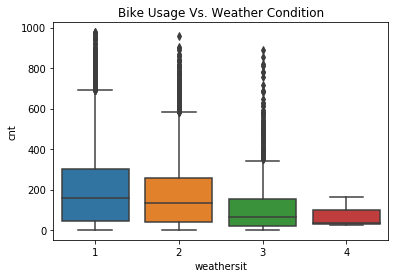

In [23]:
sns.boxplot(y=df.cnt,x=df.weathersit)
plt.title("Bike Usage Vs. Weather Condition")
plt.show()

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

This plot makes sense. Better weather = more bike usage.

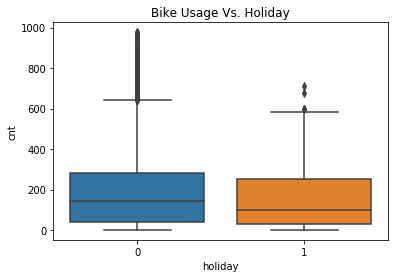

In [29]:
sns.boxplot(y=df.cnt,x=df.holiday)
plt.title("Bike Usage Vs. Holiday")
plt.show()

Before making this plot, I would think there would be usage difference if it is a holiday or not.

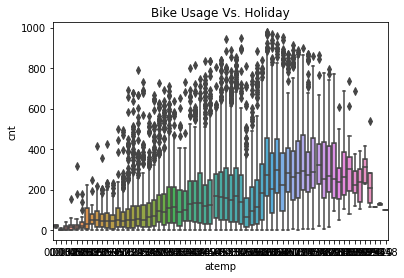

In [32]:
sns.boxplot(y=df.cnt,x=df.atemp)
plt.title("Bike Usage Vs. Holiday")
plt.show()

From this plot, we can tell there is a significant increase when temperature increase.

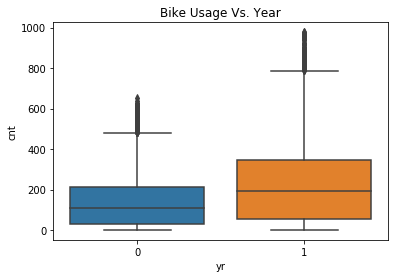

In [74]:
sns.boxplot(y=df.cnt,x=df.yr)
plt.title("Bike Usage Vs. Year")
plt.show()

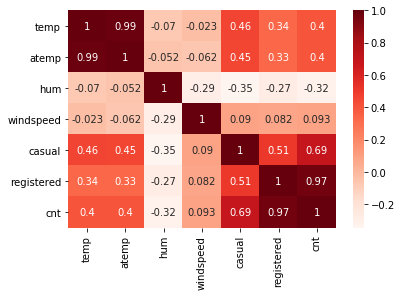

In [65]:
sns.heatmap(df.drop(["instant"],axis=1).corr(), annot=True, cmap="Reds")

In [69]:
features = df.columns
features

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Column casual and registered will be removed because cnt is the sum of these two columns. Our target is cnt.<br>
We will keep temp instead of atemp because they are the same feature in different scale <br>
We already have year column so we will remove dteday.

In [78]:
featuresupdate = features.drop(["instant","atemp","casual","registered","dteday"])
featuresupdate

Index(['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [85]:
df[featuresupdate].iloc[:,0:-1]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343


In [87]:
df[featuresupdate]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.60,0.1642,119
17375,1,1,12,20,0,1,1,2,0.26,0.60,0.1642,89
17376,1,1,12,21,0,1,1,1,0.26,0.60,0.1642,90
17377,1,1,12,22,0,1,1,1,0.26,0.56,0.1343,61


In [95]:
X=np.array(df[featuresupdate].iloc[:,0:-1])
y=np.array(df[featuresupdate][["cnt"]])

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_trian, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [100]:
from sklearn.linear_model import LinearRegression

In [102]:
linearModel=LinearRegression()

In [110]:
linearModel.fit(X=X_trian,y=y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [111]:
prediction = linearModel.predict(X_test)

In [112]:
from sklearn.metrics import mean_squared_error

In [116]:
from math import sqrt

In [117]:
sqrt(mean_squared_error(prediction,y_test))

139.62285745023337